# 一、CSV文件读取

In [175]:
import pandas as pd
data = pd.read_csv('jobs.csv',usecols=[0, 1, 2, 3], nrows=4)
print(data)
print(type(data))
print('---------------------')
# 显示结构信息
print(data.info())

   工作年限  学历            职位     职位ID
0  3-5年  本科  Python 开发工程师  5219979
1  3-5年  本科     Python工程师  4123246
2  3-5年  本科     Python工程师  5283025
3  1-3年  本科   python研发工程师  4671592
<class 'pandas.core.frame.DataFrame'>
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
工作年限    4 non-null object
学历      4 non-null object
职位      4 non-null object
职位ID    4 non-null int64
dtypes: int64(1), object(3)
memory usage: 208.0+ bytes
None


# 二、数据类型

## 1. Series类型

In [10]:
s1=pd.Series([1,2,3,4], index=['数据1','数据2','数据3','数据4'])
print(s1)

数据1    1
数据2    2
数据3    3
数据4    4
dtype: int64


其中使用如下数据构造一个Pandas序列:    
&emsp;&emsp;|-标量    
&emsp;&emsp;|-列表    
&emsp;&emsp;|-Python字典    
&emsp;&emsp;|-ndarray数据     

In [12]:
print( pd.Series( 3 ) )
print( pd.Series( [1,2,3] ) )
print( pd.Series( {
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4
} ) )
import numpy as np
print( pd.Series( np.random.random( 3 ) ) )

0    3
dtype: int64
0    1
1    2
2    3
dtype: int64
a    1
b    2
c    3
d    4
dtype: int64
0    0.060300
1    0.704810
2    0.318916
dtype: float64


## 2. DataFrame类型

DataFrame是二维标签化数据结构，与SQL表一样，或者就是Series对象字典，DataFrame可以接受如下数据输入：      
&emsp;&emsp;|-一维的ndarrays，列表，Series对象数据构成的字典       
&emsp;&emsp;|-二维ndarray对象      
&emsp;&emsp;|-结构化或者纪录化的ndarray     
&emsp;&emsp;|-Series对象      
&emsp;&emsp;|-其他DataFrame对象      

### 2.1. 字典构成

In [19]:
# 列表构成的字典 ( 列表需要一样长 )
df1=pd.DataFrame(
    {
        '列1': [1, 2, 3,4],
        '列2': ['A', 'B', 'C', 'D']
    })
print(df1)

   列1 列2
0   1  A
1   2  B
2   3  C
3   4  D


In [22]:
# ndarray构成的字典(ndarray需要一样长)
df2=pd.DataFrame(
    {
        '列1':np.array( [1, 2, 3, 4]),
        '列2': np.array( ['A', 'B', 'C', 'D'] )
    } )
print(df2)

   列1 列2
0   1  A
1   2  B
2   3  C
3   4  D


In [33]:
# Series构成的字典(Series的长度与index不一致，会自动作为新行出现，空的值成为NaN)
df3=pd.DataFrame(
    {
        '列1':pd.Series([1, 2, 3], index=['x1','x2', 'x3']),
        '列2': pd.Series( ['A', 'B', 'C', 'D'], index=['y1','x2', 'x3', 'y4'])
    } )

print(df3)


     列1   列2
x1  1.0  NaN
x2  2.0    B
x3  3.0    C
y1  NaN    A
y4  NaN    D


In [42]:
# 字典构成的字典
df4=pd.DataFrame(
    {
        '列1': {
            'a': 'x',
            'b': 'y',
            'c': 'z' },
        '列2': {
            'a':'x',
            'b':'y',
            'd':'z'}
    } )

print(df4)

    列1   列2
a    x    x
b    y    y
c    z  NaN
d  NaN    z


### 2.2 使用colums,index控制列与索引

In [43]:
df4=pd.DataFrame(
    {
        '列1': [1, 2, 3,4],
        '列2': ['A', 'B', 'C', 'D']
    },
    index=[1,2,3,4],      
    columns=['列1','列3','列2']     #控制显示的列，如果列不存在，则添加空列
)
print(df4)

   列1   列3 列2
1   1  NaN  A
2   2  NaN  B
3   3  NaN  C
4   4  NaN  D


### 2.3. 二维数组构成
&emsp;&emsp;nadarray与python的二维数组是无缝使用，下面使用Python的二维数组说明：

In [44]:
# 使用2维数组生成DataFrame(索引与列名自动生成)
df5=pd.DataFrame(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ]
)

print(df5)

   0  1  2  3
0  1  2  3  4
1  5  6  7  8


In [48]:
# 使用2维数组生成DataFrame(使用index,colums来生成索引与列名)
df6=pd.DataFrame(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ],
    index=['x','y'],
    columns=['A','B','C','D']
)

print(df6)

   A  B  C  D
x  1  2  3  4
y  5  6  7  8


### 2.4. 使用结构化二维ndarray

In [58]:
# 创建一个结构化ndarray
data = np.zeros(
    (2,),               # 两条纪录
    dtype=[ 
        ('A',  np.int32 ), 
        ('B', np.float),  
        ('C', 'U10')])
data[:] = [(1, 2.2, 'Hello'), (2,3.2, "喂")]
df7=pd.DataFrame(data)
print(df7)

# 关于numpy中数据类型，可以参考官方文档。
# 有的数据类型无法正确表达，可以采用字符串方式。
# 比如字符串在string_或者bytes_都没有指定长度的方式，可以使用'S10','a10','U10'。
# 'U10'表示的是Unicode码字符串。

   A    B      C
0  1  2.2  Hello
1  2  3.2      喂


In [61]:
# 指定索引，与控制列
df8=pd.DataFrame(data,index=['ID01','ID02'], columns=['C','A','B'])
print(df8)


          C  A    B
ID01  Hello  1  2.2
ID02      喂  2  3.2


# 三、数据元素操作

## 1. DataFrame形状与行列操作

>&emsp;&emsp; 元素操作的几种方式：    
>&emsp;&emsp;&emsp;&emsp;|-选择列：	df\[col\]	返回：Series    
>&emsp;&emsp;&emsp;&emsp;|-使用标签选择行：	df.loc\[label\]	 返回：Series    
>&emsp;&emsp;&emsp;&emsp;|-使用整数选择行：  df.iloc\[loc\]	返回：Series    
>&emsp;&emsp;&emsp;&emsp;|-使用切片选择行：  df\[5:10\]	返回：DataFrame    
>&emsp;&emsp;&emsp;&emsp;|-使用boolean向量选择行：df\[bool_vec\]	返回：DataFrame    


In [ ]:
data = pd.read_csv('jobs.csv',usecols=[0, 1, 2, 3], nrows=4)

### 1.1 形状

In [75]:
print (data.shape)

(4, 4)


### 1.2. 选择行

In [172]:
# 使用整数选择行
print( data.iloc[ 0 ] )      #注意不是使用的函数形式，是下标
print("----------------")
print( data.iloc[0:1,0:1 ] ) 
print("----------------")
print( data.loc[ 0 ] )       #默认的标签是整数
print("----------------")   
print( data[ [True,False,True,False] ] )    # 逻辑向量下标长度必须与行数一直       
print("----------------")   
# 使用切片选择行
print (data[0:1])
# 切片返回的还是是DataFrame对象
print (type(data[0:1]))



工作年限            3-5年
学历                本科
职位      Python 开发工程师
职位ID         5219979
Name: 0, dtype: object
----------------
   工作年限
0  3-5年
----------------
工作年限            3-5年
学历                本科
职位      Python 开发工程师
职位ID         5219979
Name: 0, dtype: object
----------------
   工作年限  学历            职位     职位ID
0  3-5年  本科  Python 开发工程师  5219979
2  3-5年  本科     Python工程师  5283025
----------------
   工作年限  学历            职位     职位ID
0  3-5年  本科  Python 开发工程师  5219979
<class 'pandas.core.frame.DataFrame'>


### 1.3. 选择列 

In [87]:
# 使用字典方式选择列
print ( data['工作年限'] )

# 列返回的是Series对象
print(type( data['工作年限'] ) )

# 可以使用Series的方式访问列的数据
for item in data['工作年限'] :
    print(item,type(item))

# 使用列表方式访问
print( data['工作年限'][0] )

0    3-5年
1    3-5年
2    3-5年
3    1-3年
Name: 工作年限, dtype: object
<class 'pandas.core.series.Series'>
3-5年 <class 'str'>
3-5年 <class 'str'>
3-5年 <class 'str'>
1-3年 <class 'str'>
3-5年


### 1.4. 添加新的列

In [202]:
# 创建空的DataFrame
ff=pd.DataFrame([], index=[], columns=[])
print(ff)

Empty DataFrame
Columns: []
Index: []


In [203]:
# 添加新的列
ff['C']=[1,2,3]
print(ff)

   C
0  1
1  2
2  3


### 1.5. 添加新的行

In [208]:
ff.loc[5]=5
print(ff)

   C
0  1
1  2
2  3
5  5


### 1.6. 删除行列

In [209]:
# 删除行，默认是行（原数据部影响）
ff=ff.drop([5])
print(ff)

   C
0  1
1  2
2  3


In [210]:
# 删除列，指定axis参数为1表示列。
ff=ff.drop(['C'],axis=1)
print(ff)

Empty DataFrame
Columns: []
Index: [0, 1, 2]


## 2. 转置操作

In [102]:
print(data.T)

                 0          1          2            3
工作年限          3-5年       3-5年       3-5年         1-3年
学历              本科         本科         本科           本科
职位    Python 开发工程师  Python工程师  Python工程师  python研发工程师
职位ID       5219979    4123246    5283025      4671592


## 3. 与Numpy的无缝连接操作

&emsp;&emsp;DataFrame完全可以当成ndarray在Numpy中使用；    
&emsp;&emsp;首先准备两个矩阵与向量

In [145]:
import numpy as np
v1=pd.Series( [1,2,3], index=['数据1','数据2','数据3'])
print(v1)
print("----------------")

m1 = pd.DataFrame(
    [
        [1, 2, 3],
        [4, 5, 6],
    ],
    index=[1 , 2],
    columns=['列1','列2','列3']
)

print(m1)
print("----------------")
m2 = pd.DataFrame(
    [
        [1, 2],
        [4, 5],
        [8, 9]
    ] ,
    index=[3 , 4, 6 ],
    columns=['列4','列5']
)
print(m2)

数据1    1
数据2    2
数据3    3
dtype: int64
----------------
   列1  列2  列3
1   1   2   3
2   4   5   6
----------------
   列4  列5
3   1   2
4   4   5
6   8   9


### 3.1. 数据操作运算

In [201]:
# 转置操作 (指定维度转换就有问题)
mr=np.transpose(m1)
# 操作不改变m1本身，直接返回结果
print(m1)
# 返回的结果还是DataFrame。
print(mr,type(mr))

#这是ndarray类型的转置
mm=np.array([
        [1, 2, 3],
        [4, 5, 6],
    ])
print(np.transpose(mm,(1,0)))

print(m1.T)
print(m1.transpose())
# pandas中支持转置的axes参数：he 'axes' parameter is not supported in the pandas implementation of transpose() 
# print(m1.transpose((1,0)))

   列1  列2  列3
1   1   2   3
2   4   5   6
    1  2
列1  1  4
列2  2  5
列3  3  6 <class 'pandas.core.frame.DataFrame'>
[[1 4]
 [2 5]
 [3 6]]
    1  2
列1  1  4
列2  2  5
列3  3  6
    1  2
列1  1  4
列2  2  5
列3  3  6


In [116]:
# 类型转换操作
vr=np.asarray( m1)
print(vr)

#类型转换成了ndarray
print(type(vr) )


[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>


In [129]:
# ndarray的成员函数不能在DataFrame中使用
#print( m1.sort() )

### 3.2. 代数运算

In [139]:
# 基本代数运算
# DataFrame没有重载@运算
#r=m1@m2

# * 只能同型矩阵相乘
r=m1 * m2
print(r)
r=m1 * m1
print(r)

# 标量乘法
r=m1 * 2
print(r)

# 指数乘法
r=m1 ** 2
print(r)



   列1  列2  列3  列4  列5
1 NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN
4 NaN NaN NaN NaN NaN
6 NaN NaN NaN NaN NaN
   列1  列2  列3
1   2   4   6
2   8  10  12
   列1  列2  列3
1   1   4   9
2  16  25  36
   列1  列2  列3
1   1   4   9
2  16  25  36


In [130]:
# 乘积运算
r=np.dot(m1,m2)
print(r)

[[33 39]
 [72 87]]


In [132]:
# 矩阵与向量
r=np.dot(m1,v1)
print(r)

[14 32]


In [134]:
# Kron积
r=np.kron(m1,v1)
print(r)

[[ 1  2  3  2  4  6  3  6  9]
 [ 4  8 12  5 10 15  6 12 18]]


In [154]:
# 范数
import numpy.linalg as nl
r=nl.norm(m1)
print(r)


# 行列式（必须是方阵）
m3 = pd.DataFrame(
    [
        [1, 0, 1],
        [0, 2, 0],
        [0, 0, 0],
    ]
)

r=nl.det(m3)
print(r)

#计算矩阵的秩
r=nl.matrix_rank(m3)
print(r)

9.539392014169456
0.0
2


### 3.3. 数学运算

In [155]:
# 三角函数
r=np.sin(m1)
print(r)

         列1        列2        列3
1  0.841471  0.909297  0.141120
2 -0.756802 -0.958924 -0.279415


### 3.4. 统计运算

In [157]:
# 中值（排序后中间那个值，如果数组长度为偶数，这是中间两个的平均值）
print(m1)
r=np.median(m1)
print(r)

   列1  列2  列3
1   1   2   3
2   4   5   6
3.5


In [168]:
# 均值
r=np.mean(m1)
print(r)
mm=np.array([
        [1, 2, 3],
        [4, 5, 6],
    ])
r=np.mean(mm,axis=(0))
print(r)
r=np.median(mm)
print(r)

列1    2.5
列2    3.5
列3    4.5
dtype: float64
[2.5 3.5 4.5]
3.5


# 四、DEMO

In [253]:
data = pd.read_csv('jobs.csv', nrows=20)
print(data)

     工作年限  学历            职位     职位ID       薪水  城市                 发布时间
0    3-5年  本科  Python 开发工程师  5219979  15k-25k  杭州  2018-11-15 09:50:23
1    3-5年  本科     Python工程师  4123246  18k-35k  上海  2018-11-15 09:49:33
2    3-5年  本科     Python工程师  5283025  15k-30k  成都  2018-11-15 10:05:33
3    1-3年  本科   python研发工程师  4671592  15k-30k  杭州  2018-11-14 13:53:29
4    3-5年  本科   Python开发工程师  4879656  18k-36k  北京  2018-11-14 21:39:45
5    3-5年  本科   Python开发工程师  5267750  15k-25k  上海  2018-11-14 14:50:01
6    3-5年  本科     Python工程师  3234474  15k-30k  杭州  2018-11-14 10:40:50
7    1-3年  本科     Python工程师  5056370  15k-30k  上海  2018-11-12 16:09:34
8   5-10年  本科   python开发工程师  5253263  25k-40k  上海  2018-11-15 09:59:33
9    3-5年  本科      python开发  5212936  15k-30k  苏州  2018-11-14 14:50:13
10   1-3年  本科   Python开发工程师  5151694   8k-12k  苏州  2018-11-14 11:34:33
11   1-3年  本科      python开发  5304756    5k-7k  上海  2018-11-14 09:49:22
12   3-5年  本科   Python研发工程师  5276211  17k-24k  北京  2018-11-14 15:38:16
13    

In [254]:
salary=data['薪水']
print(salary)

0     15k-25k
1     18k-35k
2     15k-30k
3     15k-30k
4     18k-36k
5     15k-25k
6     15k-30k
7     15k-30k
8     25k-40k
9     15k-30k
10     8k-12k
11      5k-7k
12    17k-24k
13    13k-25k
14    10k-18k
15    15k-25k
16    15k-20k
17    15k-30k
18    15k-25k
19      3k-5k
Name: 薪水, dtype: object


In [255]:
data1=data.drop(['薪水'], axis=1)
print(data1)

     工作年限  学历            职位     职位ID  城市                 发布时间
0    3-5年  本科  Python 开发工程师  5219979  杭州  2018-11-15 09:50:23
1    3-5年  本科     Python工程师  4123246  上海  2018-11-15 09:49:33
2    3-5年  本科     Python工程师  5283025  成都  2018-11-15 10:05:33
3    1-3年  本科   python研发工程师  4671592  杭州  2018-11-14 13:53:29
4    3-5年  本科   Python开发工程师  4879656  北京  2018-11-14 21:39:45
5    3-5年  本科   Python开发工程师  5267750  上海  2018-11-14 14:50:01
6    3-5年  本科     Python工程师  3234474  杭州  2018-11-14 10:40:50
7    1-3年  本科     Python工程师  5056370  上海  2018-11-12 16:09:34
8   5-10年  本科   python开发工程师  5253263  上海  2018-11-15 09:59:33
9    3-5年  本科      python开发  5212936  苏州  2018-11-14 14:50:13
10   1-3年  本科   Python开发工程师  5151694  苏州  2018-11-14 11:34:33
11   1-3年  本科      python开发  5304756  上海  2018-11-14 09:49:22
12   3-5年  本科   Python研发工程师  5276211  北京  2018-11-14 15:38:16
13     不限  本科     Python工程师  5187936  杭州  2018-11-12 18:24:49
14   3-5年  本科      python开发  5226606  北京  2018-11-14 10:15:59
15   1-3

In [261]:
low=[float(v.replace('k','000').split('-')[0]) for v in salary]
print(low)
upper=[float(v.replace('k','000').split('-')[1])  for v in salary]
print(upper)

[15000.0, 18000.0, 15000.0, 15000.0, 18000.0, 15000.0, 15000.0, 15000.0, 25000.0, 15000.0, 8000.0, 5000.0, 17000.0, 13000.0, 10000.0, 15000.0, 15000.0, 15000.0, 15000.0, 3000.0]
[25000.0, 35000.0, 30000.0, 30000.0, 36000.0, 25000.0, 30000.0, 30000.0, 40000.0, 30000.0, 12000.0, 7000.0, 24000.0, 25000.0, 18000.0, 25000.0, 20000.0, 30000.0, 25000.0, 5000.0]


In [262]:
data1['最高']=upper
data1['最低']=low
print(data1)

     工作年限  学历            职位     职位ID  城市                 发布时间       最高  \
0    3-5年  本科  Python 开发工程师  5219979  杭州  2018-11-15 09:50:23  25000.0   
1    3-5年  本科     Python工程师  4123246  上海  2018-11-15 09:49:33  35000.0   
2    3-5年  本科     Python工程师  5283025  成都  2018-11-15 10:05:33  30000.0   
3    1-3年  本科   python研发工程师  4671592  杭州  2018-11-14 13:53:29  30000.0   
4    3-5年  本科   Python开发工程师  4879656  北京  2018-11-14 21:39:45  36000.0   
5    3-5年  本科   Python开发工程师  5267750  上海  2018-11-14 14:50:01  25000.0   
6    3-5年  本科     Python工程师  3234474  杭州  2018-11-14 10:40:50  30000.0   
7    1-3年  本科     Python工程师  5056370  上海  2018-11-12 16:09:34  30000.0   
8   5-10年  本科   python开发工程师  5253263  上海  2018-11-15 09:59:33  40000.0   
9    3-5年  本科      python开发  5212936  苏州  2018-11-14 14:50:13  30000.0   
10   1-3年  本科   Python开发工程师  5151694  苏州  2018-11-14 11:34:33  12000.0   
11   1-3年  本科      python开发  5304756  上海  2018-11-14 09:49:22   7000.0   
12   3-5年  本科   Python研发工程师  5276211  

In [263]:
dd=data1.groupby(['工作年限','城市']).sum()
print(dd)


              职位ID       最高       最低
工作年限  城市                            
1-3年  上海  10361126  37000.0  20000.0
      北京   9910072  50000.0  30000.0
      杭州   4671592  30000.0  15000.0
      苏州   5151694  12000.0   8000.0
3-5年  上海  13433523  90000.0  48000.0
      北京  15382473  78000.0  45000.0
      广州   5244706  20000.0  15000.0
      成都  10570821  35000.0  18000.0
      杭州   8454453  55000.0  30000.0
      苏州   5212936  30000.0  15000.0
5-10年 上海   5253263  40000.0  25000.0
不限    杭州   5187936  25000.0  13000.0


In [264]:
dd=data1[['工作年限','城市','最高','最低']].groupby(['工作年限','城市']).mean()
print(dd)

               最高       最低
工作年限  城市                  
1-3年  上海  18500.0  10000.0
      北京  25000.0  15000.0
      杭州  30000.0  15000.0
      苏州  12000.0   8000.0
3-5年  上海  30000.0  16000.0
      北京  26000.0  15000.0
      广州  20000.0  15000.0
      成都  17500.0   9000.0
      杭州  27500.0  15000.0
      苏州  30000.0  15000.0
5-10年 上海  40000.0  25000.0
不限    杭州  25000.0  13000.0


In [268]:
d1=dd.groupby(level=[0,1])
print(d1.sum())

               最高       最低
工作年限  城市                  
1-3年  上海  18500.0  10000.0
      北京  25000.0  15000.0
      杭州  30000.0  15000.0
      苏州  12000.0   8000.0
3-5年  上海  30000.0  16000.0
      北京  26000.0  15000.0
      广州  20000.0  15000.0
      成都  17500.0   9000.0
      杭州  27500.0  15000.0
      苏州  30000.0  15000.0
5-10年 上海  40000.0  25000.0
不限    杭州  25000.0  13000.0


In [283]:
print(d1)
d2=d1.get_group(('3-5年','杭州'))
print(d2)

              最高       最低
工作年限 城市                  
3-5年 杭州  27500.0  15000.0


# 五、可视化

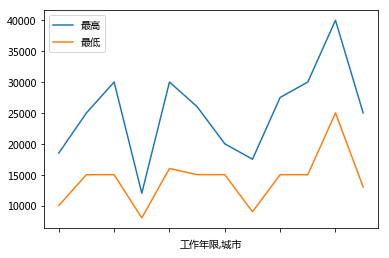

In [289]:
% matplotlib inline
import matplotlib.pyplot as plt
dd.plot()

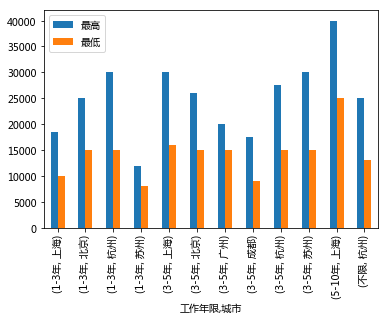

In [292]:
dd.plot.bar()

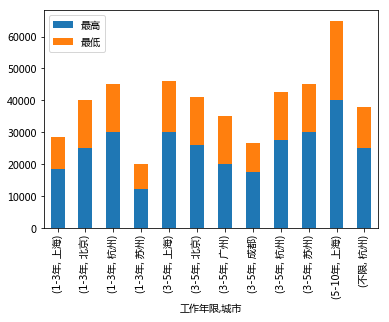

In [293]:
dd.plot.bar(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e95b320>,
      dtype=object)

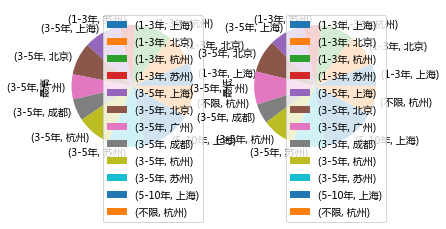

In [296]:
dd.plot.pie(subplots=True)

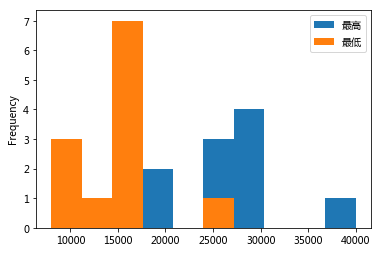

In [297]:
dd.plot.hist()